In [99]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [158]:
preds = pd.read_csv('/neurospin/dico/jlaval/Output/5_models_FIP_left_3_layer_proj/16-34-28_0/FIP_left_custom_embeddings/Left_FIP/test_predicted_probas.csv')
preds = pd.read_csv('/neurospin/dico/jlaval/Output/5_models_FIP_right_3_layer_proj/pepper_05_0/FIP_right_custom_embeddings/Right_FIP/test_predicted_probas.csv')
#preds = pd.read_csv('/neurospin/dico/jlaval/Output/imagen_polar_left/13-39-38_135/imagen_random_embeddings/Left_Interrup_RS_CS/full_predicted_probas.csv') # BEST

In [159]:
preds

,Subject,label,proba_pred_0,label_pred_0,median_pred,mean_pred,average_model
0,100206,1,0.996199,1,0.996199,0.996199,0.996199
1,100307,1,0.751290,1,0.751290,0.751290,0.751290
2,100610,1,0.378581,0,0.378581,0.378581,0.378581
3,101309,1,0.853743,1,0.853743,0.853743,0.853743
4,101410,0,0.790275,1,0.790275,0.790275,0.790275
...,...,...,...,...,...,...,...
385,983773,1,0.992475,1,0.992475,0.992475,0.992475
386,984472,1,0.945303,1,0.945303,0.945303,0.945303
387,991267,1,0.995878,1,0.995878,0.995878,0.995878
388,993675,0,0.745901,1,0.745901,0.745901,0.745901


In [160]:
ba = balanced_accuracy_score(preds['label'], preds['label_pred_0'])
print(ba)
print(sum(preds['label']), sum(preds['label_pred_0']))
# where is threshold set ?
threshold = preds.loc[preds['label_pred_0']==1].sort_values(by='proba_pred_0')['proba_pred_0'].tolist()[0]
print(f'proba threshold: {threshold}')

0.812962962962963
270 234
proba threshold: 0.7131537483857285


In [161]:
tn, fp, fn, tp = confusion_matrix(preds['label'], preds['label_pred_0']).ravel()
print(f"TN: {tn}, TP: {tp}, FN: {fn}, FP: {fp}")

TN: 100, TP: 214, FN: 56, FP: 20


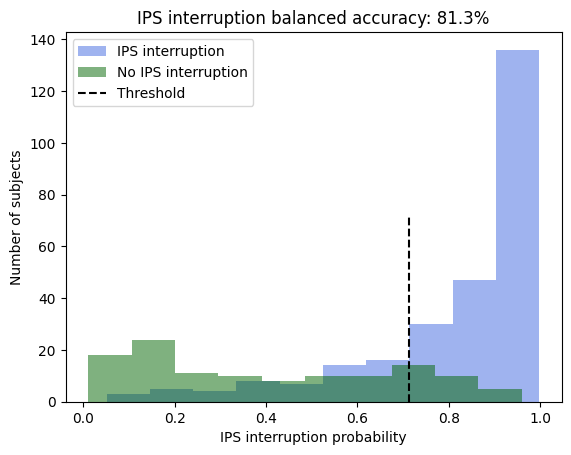

In [162]:
## plot proba distribs
plt.hist(preds.loc[preds['label']==1]['mean_pred'], color='royalblue', alpha=0.5, label='IPS interruption')
plt.hist(preds.loc[preds['label']==0]['mean_pred'], color='darkgreen', alpha=0.5, label='No IPS interruption')
plt.vlines(x = threshold, ymin=0, ymax=0.5*plt.gca().get_ylim()[1], color = 'k', label = 'Threshold', linestyles='--')
plt.xlabel('IPS interruption probability')
plt.ylabel('Number of subjects')
plt.legend()
plt.title(f'IPS interruption balanced accuracy: {ba*100:.1f}%')
plt.show()

In [153]:
## create a summary CSV with labels, and preds ?

In [154]:
preds

,Subject,label,proba_pred_0,label_pred_0,median_pred,mean_pred,average_model
0,100206,0,0.050699,0,0.050699,0.050699,0.050699
1,100307,1,0.896674,1,0.896674,0.896674,0.896674
2,100610,0,0.037483,0,0.037483,0.037483,0.037483
3,101309,1,0.054720,0,0.054720,0.054720,0.054720
4,101410,0,0.455355,0,0.455355,0.455355,0.455355
...,...,...,...,...,...,...,...
385,983773,1,0.976320,1,0.976320,0.976320,0.976320
386,984472,1,0.381963,0,0.381963,0.381963,0.381963
387,991267,1,0.058738,0,0.058738,0.058738,0.058738
388,993675,1,0.301881,0,0.301881,0.301881,0.301881


In [155]:
df = preds[['Subject', 'label', 'proba_pred_0', 'label_pred_0']]
df.columns=['Subject', 'Manual_label', 'Predicted_proba', 'Predicted_label']

In [156]:
df

,Subject,Manual_label,Predicted_proba,Predicted_label
0,100206,0,0.050699,0
1,100307,1,0.896674,1
2,100610,0,0.037483,0
3,101309,1,0.054720,0
4,101410,0,0.455355,0
...,...,...,...,...
385,983773,1,0.976320,1
386,984472,1,0.381963,0
387,991267,1,0.058738,0
388,993675,1,0.301881,0


In [157]:
df.to_csv('/neurospin/dico/jlaval/data/labels_FIP/FIP_labels_left.csv', index=False)